In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.plotly as py

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [219]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023653812358>,
      dtype=object)

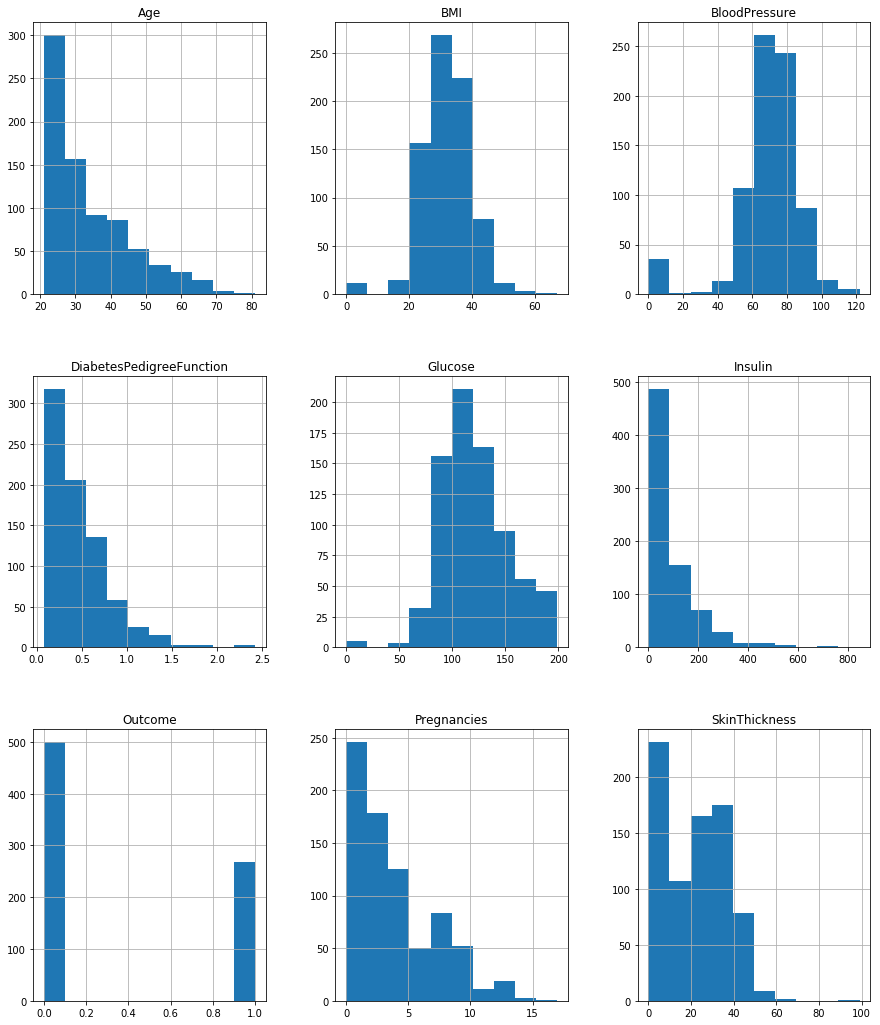

In [5]:
df.hist(figsize=(15,18))

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics         import accuracy_score
#max_depth
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [231]:
def get_mae(max_depth, X_train, X_test, y_train, y_test):   
    DT = DecisionTreeClassifier(max_leaf_nodes=max_depth,min_samples_split=19,random_state=9)

    #fiting the model
    DT.fit(X_train, y_train)

    #prediction
    y_pred = DT.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    #Accuracy
    return (DT.score(X_test, y_test)*100,mae,accuracy)

In [232]:
for max_leaf_nodes in [5,15,20,25,50, 500]:
    my_mae,mae,accuracy = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max_depth: %d  \t\t Accuracy:  %f \t Mean Absolute error:  %f \t Accuracy score:  %f" %(max_leaf_nodes, my_mae,mae,accuracy))

Max_depth: 5  		 Accuracy:  75.000000 	 Mean Absolute error:  0.250000 	 Accuracy score:  0.750000
Max_depth: 15  		 Accuracy:  77.083333 	 Mean Absolute error:  0.229167 	 Accuracy score:  0.770833
Max_depth: 20  		 Accuracy:  77.083333 	 Mean Absolute error:  0.229167 	 Accuracy score:  0.770833
Max_depth: 25  		 Accuracy:  77.604167 	 Mean Absolute error:  0.223958 	 Accuracy score:  0.776042
Max_depth: 50  		 Accuracy:  79.166667 	 Mean Absolute error:  0.208333 	 Accuracy score:  0.791667
Max_depth: 500  		 Accuracy:  79.166667 	 Mean Absolute error:  0.208333 	 Accuracy score:  0.791667


In [233]:
from sklearn.ensemble import RandomForestClassifier
def get_maeR(max_depth, X_train, X_test, y_train, y_test):   
    DT = RandomForestClassifier(max_leaf_nodes=max_depth,min_samples_split=18,random_state=1)

    #fiting the model
    DT.fit(X_train, y_train)

    #prediction
    y_pred = DT.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    #Accuracy
    return (DT.score(X_test, y_test)*100,mae,accuracy)

In [234]:
for max_leaf_nodes in [5,15,20,25,30, 50,500]:
    my_mae,mae,accuracy = get_maeR(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max_depth: %d  \t\t Accuracy:  %f \t Mean Absolute error:  %f \t Accuracy score:  %f" %(max_leaf_nodes, my_mae,mae,accuracy))

Max_depth: 5  		 Accuracy:  75.000000 	 Mean Absolute error:  0.250000 	 Accuracy score:  0.750000
Max_depth: 15  		 Accuracy:  76.562500 	 Mean Absolute error:  0.234375 	 Accuracy score:  0.765625
Max_depth: 20  		 Accuracy:  78.645833 	 Mean Absolute error:  0.213542 	 Accuracy score:  0.786458
Max_depth: 25  		 Accuracy:  78.125000 	 Mean Absolute error:  0.218750 	 Accuracy score:  0.781250
Max_depth: 30  		 Accuracy:  79.166667 	 Mean Absolute error:  0.208333 	 Accuracy score:  0.791667
Max_depth: 50  		 Accuracy:  80.208333 	 Mean Absolute error:  0.197917 	 Accuracy score:  0.802083
Max_depth: 500  		 Accuracy:  80.208333 	 Mean Absolute error:  0.197917 	 Accuracy score:  0.802083


C:\Users\Ahmed-kamaleldin\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\Ahmed-kamaleldin\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\Ahmed-kamaleldin\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\Ahmed-kamaleldin\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\Ahmed-kamaleldin\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default 